# LASED Example Notebook

This is a notebook to demonstrate how to use LASED. LASED stands for Laser-Atom interaction Simulator using quantum ElectroDynamics. An atomic level system is built, laser parameters are defined, and a the laser-atomic system dynamics are simulated. 

In [1]:
%run "base-LASED/LASED/laser_atom_system.py"
%run "base-LASED/LASED/rotation.py"
%run "base-LASED/LASED/time_evolution.py"

import plotly.graph_objects as go

## Setting up the system

To set up a Laser-Atom system you must first declare the atomic states which you want to work with and label them.

Then, you must put the states into either the ground or excited states which the laser couples to.

Then, all other laser parameters must be input.

In [2]:
# System parameters
n = 8  # number of energy levels in system

# Create states
one = State(L = 2, S = 0, m = -2, w = 0, label = 1)
two = State(L = 2, S = 0, m = -1, w = 0, label = 2)
three = State(L = 2, S = 0, m = 0, w = 0, label = 3)
four = State(L = 2, S = 0, m = 1, w = 0, label = 4)
five = State(L = 2, S = 0, m = 2, w = 0, label = 5)
six = State(L = 1, S = 0, m = -1, w = 0, label = 6)
seven = State(L = 1, S = 0, m = 0, w = 0, label = 7)
eight = State(L = 1, S = 0, m = 1, w = 0, label = 8)

G = [one, two, three, four, five] # ground states
E = [six, seven, eight] # excited states
Q = [1, -1] # laser radiation polarisation
tau = 100 # lifetime in ns/rad (take from NIST 1/A_ki as this is in rad/s)
tau_f = 100e3 # non-radiative lifetime of rydberg upper state to other states in ns/rad

laser_power = 100 # laser intensity in mW
r_sigma = 0.75  # radial distance to 2D standard deviation in mm
n_intensity = 3
laser_wavelength = 827e-9 #452.821e-9 # wavelength of laser

# Doppler detuning parameters
doppler_width = 0.1*2*PI # doppler width in Grad/s
delta_upper = 3*doppler_width
delta_lower = -3*doppler_width
doppler_steps = 3
doppler_detunings = np.linspace(delta_lower, delta_upper, doppler_steps)
atomic_velocity = 0  # Velocity component of atoms in direction of laser beam

# Simulation parameters
start_time = 0
stop_time = 1000 # in ns
time_steps = 1000
time = np.linspace(start_time, stop_time, time_steps)

helium_system = LaserAtomSystem(E, G, tau, Q, laser_wavelength, tau_f = tau_f, 
                                 laser_intensity = laser_power, laser_power = laser_power)
helium_system.setRho_0(one, one, 1/3)
helium_system.setRho_0(three, three, 1/3) 
helium_system.setRho_0(five, five, 1/3)

In [3]:
# beam_profile_averaging = True, doppler_averaging = True,
helium_system.timeEvolution(time, 
                            r_sigma = r_sigma,
                            n_beam_averaging = n_intensity,
                            doppler_width = doppler_width,
                            doppler_detunings = doppler_detunings)

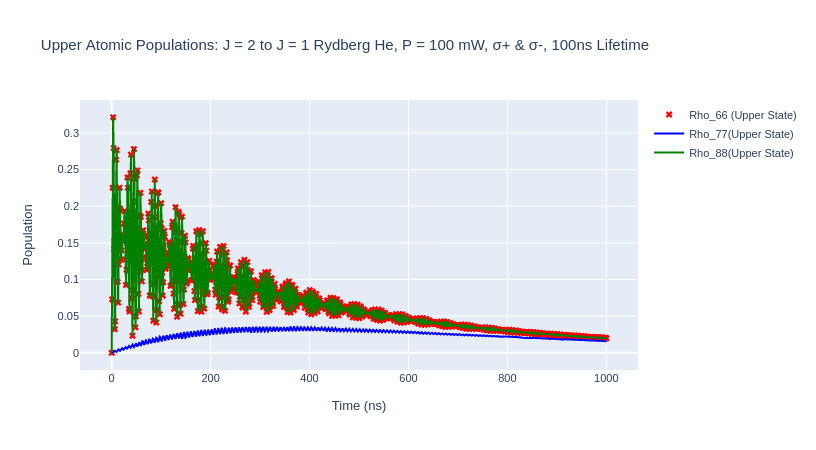

In [4]:
las_sys = helium_system
rho_66 = [ abs(rho) for rho in las_sys.Rho_t(six, six)]
rho_77 = [abs(rho) for rho in las_sys.Rho_t(seven, seven)]
rho_88 = [abs(rho) for rho in las_sys.Rho_t(eight, eight)]

fig_upper = go.Figure(data = go.Scatter(x = time,
                                 y = rho_66,
                                 mode = 'markers',
                                    name = "Rho_66 (Upper State)",
                                    marker = dict(
                                color = 'red',
                                symbol = 'x',
                            )))

fig_upper.add_trace(go.Scatter(x = time,
                                 y = rho_77,
                                 mode = 'lines',
                                    name = "Rho_77(Upper State)",
                                    marker = dict(
                                color = 'blue',
                                symbol = 'square',
                           )))
fig_upper.add_trace(go.Scatter(x = time,
                                 y = rho_88,
                                 mode = 'lines',
                                    name = "Rho_88(Upper State)",
                                    marker = dict(
                                color = 'green',
                                symbol = 'circle',
                           )))

fig_upper.update_layout(title = "Upper Atomic Populations: J = 2 to J = 1 Rydberg He, P = 100 mW, σ+ & σ-, 100ns Lifetime",
                 xaxis_title = "Time (ns)",
                 yaxis_title = "Population",
                font = dict(
                    size = 11))
fig_upper.show()

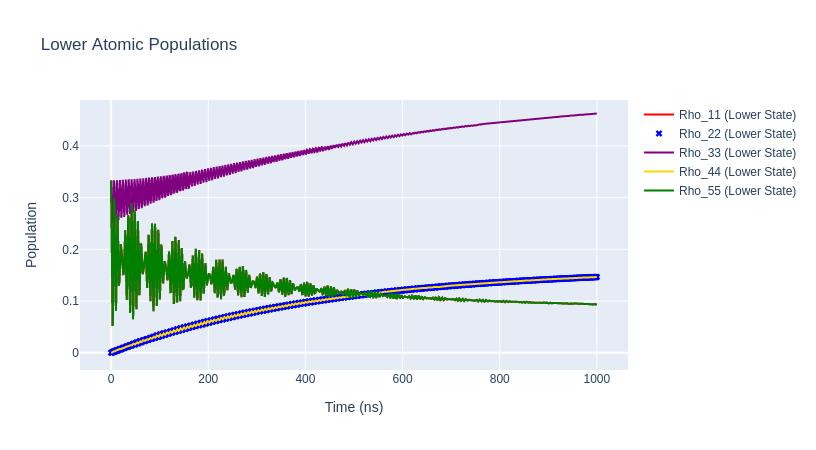

In [5]:
rho11 = [ abs(rho) for rho in las_sys.Rho_t(one, one)]
rho22 = [ abs(rho) for rho in las_sys.Rho_t(two, two)]
rho33 = [ abs(rho) for rho in las_sys.Rho_t(three, three)]
rho44 = [ abs(rho) for rho in las_sys.Rho_t(four, four)]
rho55 = [ abs(rho) for rho in las_sys.Rho_t(five, five)]


fig_lower = go.Figure(data = go.Scatter(x = time,
                                 y = rho11,
                                 mode = 'lines',
                                    name = "Rho_11 (Lower State)",
                                    marker = dict(
                                color = 'red',
                                symbol = 'circle',
                            )))
fig_lower.add_trace(go.Scatter(x = time,
                                 y = rho22,
                                 mode = 'markers',
                                    name = "Rho_22 (Lower State)",
                                    marker = dict(
                                color = 'blue',
                                symbol = 'x',
                            )))
fig_lower.add_trace(go.Scatter(x = time,
                                 y = rho33,
                                 mode = 'lines',
                                    name = "Rho_33 (Lower State)",
                                    marker = dict(
                                color = 'purple',
                                symbol = 'x',
                            )))
fig_lower.add_trace(go.Scatter(x = time,
                                 y = rho44,
                                 mode = 'lines',
                                    name = "Rho_44 (Lower State)",
                                    marker = dict(
                                color = 'gold',
                                symbol = 'x',
                            )))
fig_lower.add_trace(go.Scatter(x = time,
                                 y = rho55,
                                 mode = 'lines',
                                    name = "Rho_55 (Lower State)",
                                    marker = dict(
                                color = 'green',
                                symbol = 'square',
                            )))
fig_lower.update_layout(title = "Lower Atomic Populations",
                        xaxis_title = "Time (ns)",
                 yaxis_title = "Population")
fig_lower.show()

# Rotation

In [6]:
alpha = PI/2
beta = PI/2
gamma = -PI/2
helium_system_rot = helium_system
helium_system_rot.rotateRho_0(alpha, beta, gamma)
helium_system_rot.Q = [0]

In [7]:
# beam_profile_averaging = True, doppler_averaging = True,
print(helium_system_rot)
helium_system_rot.timeEvolution(time, 
                            r_sigma = r_sigma,
                            n_beam_averaging = n_intensity,
                            doppler_width = doppler_width,
                            doppler_detunings = doppler_detunings,
                            rabi_scaling = np.sqrt(2))

LaserAtomSystem([6, 7, 8], [1, 2, 3, 4, 5], 100, [0], [1, 0, -1], 8.27e-07, 100000.0, 100, 100)


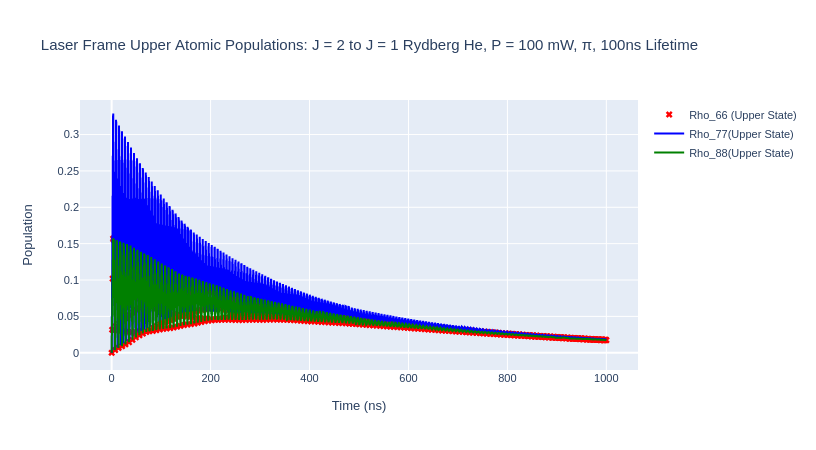

In [8]:
las_sys = helium_system_rot
rho_66 = [ abs(rho) for rho in las_sys.Rho_t(six, six)]
rho_77 = [abs(rho) for rho in las_sys.Rho_t(seven, seven)]
rho_88 = [abs(rho) for rho in las_sys.Rho_t(eight, eight)]

fig_upper = go.Figure(data = go.Scatter(x = time,
                                 y = rho_66,
                                 mode = 'markers',
                                    name = "Rho_66 (Upper State)",
                                    marker = dict(
                                color = 'red',
                                symbol = 'x',
                            )))

fig_upper.add_trace(go.Scatter(x = time,
                                 y = rho_77,
                                 mode = 'lines',
                                    name = "Rho_77(Upper State)",
                                    marker = dict(
                                color = 'blue',
                                symbol = 'square',
                           )))
fig_upper.add_trace(go.Scatter(x = time,
                                 y = rho_88,
                                 mode = 'lines',
                                    name = "Rho_88(Upper State)",
                                    marker = dict(
                                color = 'green',
                                symbol = 'circle',
                           )))

fig_upper.update_layout(title = "Laser Frame Upper Atomic Populations: J = 2 to J = 1 Rydberg He, P = 100 mW, π, 100ns Lifetime",
                 xaxis_title = "Time (ns)",
                 yaxis_title = "Population",
                font = dict(
                    size = 11))
fig_upper.show()

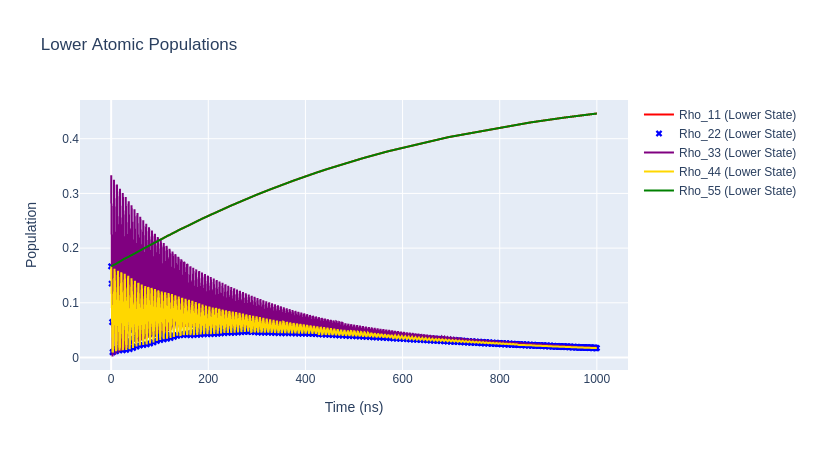

In [9]:
rho11 = [ abs(rho) for rho in las_sys.Rho_t(one, one)]
rho22 = [ abs(rho) for rho in las_sys.Rho_t(two, two)]
rho33 = [ abs(rho) for rho in las_sys.Rho_t(three, three)]
rho44 = [ abs(rho) for rho in las_sys.Rho_t(four, four)]
rho55 = [ abs(rho) for rho in las_sys.Rho_t(five, five)]


fig_lower = go.Figure(data = go.Scatter(x = time,
                                 y = rho11,
                                 mode = 'lines',
                                    name = "Rho_11 (Lower State)",
                                    marker = dict(
                                color = 'red',
                                symbol = 'circle',
                            )))
fig_lower.add_trace(go.Scatter(x = time,
                                 y = rho22,
                                 mode = 'markers',
                                    name = "Rho_22 (Lower State)",
                                    marker = dict(
                                color = 'blue',
                                symbol = 'x',
                            )))
fig_lower.add_trace(go.Scatter(x = time,
                                 y = rho33,
                                 mode = 'lines',
                                    name = "Rho_33 (Lower State)",
                                    marker = dict(
                                color = 'purple',
                                symbol = 'x',
                            )))
fig_lower.add_trace(go.Scatter(x = time,
                                 y = rho44,
                                 mode = 'lines',
                                    name = "Rho_44 (Lower State)",
                                    marker = dict(
                                color = 'gold',
                                symbol = 'x',
                            )))
fig_lower.add_trace(go.Scatter(x = time,
                                 y = rho55,
                                 mode = 'lines',
                                    name = "Rho_55 (Lower State)",
                                    marker = dict(
                                color = 'green',
                                symbol = 'square',
                            )))
fig_lower.update_layout(title = "Lower Atomic Populations",
                        xaxis_title = "Time (ns)",
                 yaxis_title = "Population")
fig_lower.show()

In [10]:
helium_system_rot.rotateRho_t(alpha, -beta, gamma)
print("Natural Frame final populations")

Optical coherences are preserved under rotation. To obtain these in a new reference frame, rotate rho_0 and then evolve in the new reference frame with the correct polarisation.
Natural Frame final populations


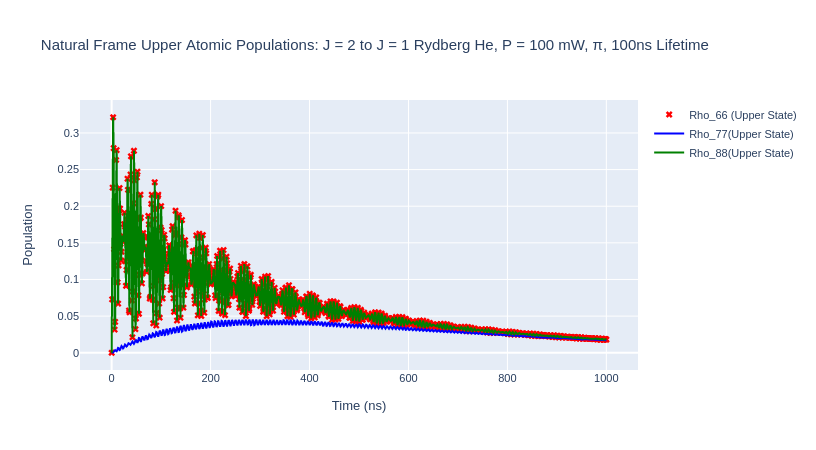

In [11]:
las_sys = helium_system_rot
rho_66 = [ abs(rho) for rho in las_sys.Rho_t(six, six)]
rho_77 = [abs(rho) for rho in las_sys.Rho_t(seven, seven)]
rho_88 = [abs(rho) for rho in las_sys.Rho_t(eight, eight)]

fig_upper = go.Figure(data = go.Scatter(x = time,
                                 y = rho_66,
                                 mode = 'markers',
                                    name = "Rho_66 (Upper State)",
                                    marker = dict(
                                color = 'red',
                                symbol = 'x',
                            )))

fig_upper.add_trace(go.Scatter(x = time,
                                 y = rho_77,
                                 mode = 'lines',
                                    name = "Rho_77(Upper State)",
                                    marker = dict(
                                color = 'blue',
                                symbol = 'square',
                           )))
fig_upper.add_trace(go.Scatter(x = time,
                                 y = rho_88,
                                 mode = 'lines',
                                    name = "Rho_88(Upper State)",
                                    marker = dict(
                                color = 'green',
                                symbol = 'circle',
                           )))

fig_upper.update_layout(title = "Natural Frame Upper Atomic Populations: J = 2 to J = 1 Rydberg He, P = 100 mW, π, 100ns Lifetime",
                 xaxis_title = "Time (ns)",
                 yaxis_title = "Population",
                font = dict(
                    size = 11))
fig_upper.show()

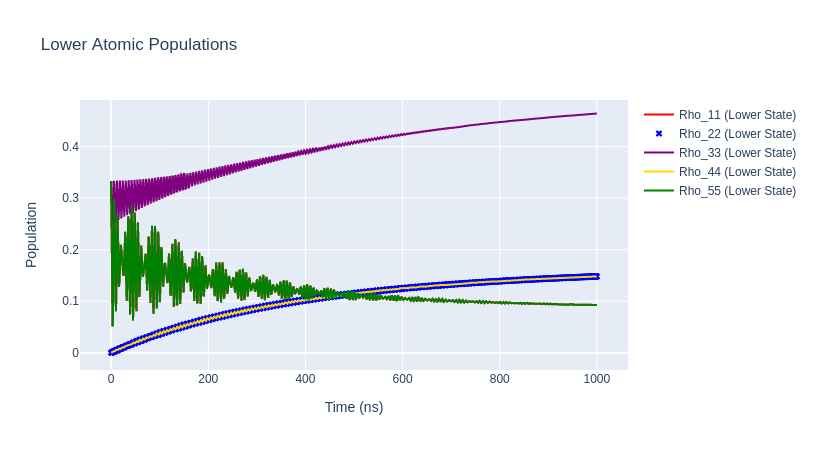

In [12]:
rho11 = [ abs(rho) for rho in las_sys.Rho_t(one, one)]
rho22 = [ abs(rho) for rho in las_sys.Rho_t(two, two)]
rho33 = [ abs(rho) for rho in las_sys.Rho_t(three, three)]
rho44 = [ abs(rho) for rho in las_sys.Rho_t(four, four)]
rho55 = [ abs(rho) for rho in las_sys.Rho_t(five, five)]


fig_lower = go.Figure(data = go.Scatter(x = time,
                                 y = rho11,
                                 mode = 'lines',
                                    name = "Rho_11 (Lower State)",
                                    marker = dict(
                                color = 'red',
                                symbol = 'circle',
                            )))
fig_lower.add_trace(go.Scatter(x = time,
                                 y = rho22,
                                 mode = 'markers',
                                    name = "Rho_22 (Lower State)",
                                    marker = dict(
                                color = 'blue',
                                symbol = 'x',
                            )))
fig_lower.add_trace(go.Scatter(x = time,
                                 y = rho33,
                                 mode = 'lines',
                                    name = "Rho_33 (Lower State)",
                                    marker = dict(
                                color = 'purple',
                                symbol = 'x',
                            )))
fig_lower.add_trace(go.Scatter(x = time,
                                 y = rho44,
                                 mode = 'lines',
                                    name = "Rho_44 (Lower State)",
                                    marker = dict(
                                color = 'gold',
                                symbol = 'x',
                            )))
fig_lower.add_trace(go.Scatter(x = time,
                                 y = rho55,
                                 mode = 'lines',
                                    name = "Rho_55 (Lower State)",
                                    marker = dict(
                                color = 'green',
                                symbol = 'square',
                            )))
fig_lower.update_layout(title = "Lower Atomic Populations",
                        xaxis_title = "Time (ns)",
                 yaxis_title = "Population")
fig_lower.show()